The dataset that i'm going to use is the German traffic signs datase.
You can download the dataset from [here](https://benchmark.ini.rub.de/gtsdb_dataset.html)

#Libs

In [15]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model

from subprocess import check_output
from sklearn.model_selection import train_test_split



import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle

# import libraries
import pickle

%matplotlib inline

# Dataset

Download the dataset then move it to a folder inside the root folder of the project. In thsi case, I created a folder called "dataset" inside the root folder.

In [5]:
!pwd

/content


In [7]:
with open("dataset/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("dataset/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("dataset/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [9]:
X_train

array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ...,

        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]],

        [[ 28,  23,  23],
         [ 29,  24,  24],
         [ 31,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 28,  24,  21]],

        [[ 29,  23,  23],
         [ 30,  24,  24],
         [ 32,  24,  23],
         ...,
         [ 27,  24,  22],
        

In [11]:
X_train, y_train = shuffle(X_train, y_train)

In [12]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)#convert to grayscale
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)#convert to grayscale
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)#convert to grayscale
X_train_gray_norm = (X_train_gray - 128)/128 #normalize
X_test_gray_norm = (X_test_gray - 128)/128 #normalize
X_validation_gray_norm = (X_validation_gray - 128)/128 #normalize

# MODEL

In [17]:
image_shape = X_train_gray[1].shape
image_shape

(32, 32, 1)

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,3, 3, input_shape =image_shape, activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(43, activation = 'sigmoid'))


In [19]:
model.compile(loss ='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False),metrics =['accuracy'])


In [21]:
history = model.fit(X_train_gray_norm,y_train,batch_size=32,epochs=60,verbose=1,validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/60
1088/1088 [==============================] - 20s 17ms/step - loss: 1.7843 - accuracy: 0.5098 - val_loss: 0.6713 - val_accuracy: 0.8188
Epoch 2/60
1088/1088 [==============================] - 19s 17ms/step - loss: 0.6263 - accuracy: 0.8085 - val_loss: 0.3814 - val_accuracy: 0.8844
Epoch 3/60
1088/1088 [==============================] - 18s 17ms/step - loss: 0.4261 - accuracy: 0.8684 - val_loss: 0.3108 - val_accuracy: 0.9084
Epoch 4/60
1088/1088 [==============================] - 18s 17ms/step - loss: 0.3266 - accuracy: 0.8986 - val_loss: 0.2806 - val_accuracy: 0.9279
Epoch 5/60
1088/1088 [==============================] - 18s 17ms/step - loss: 0.2725 - accuracy: 0.9143 - val_loss: 0.2661 - val_accuracy: 0.9336
Epoch 6/60
1088/1088 [==============================] - 21s 19ms/step - loss: 0.2361 - accuracy: 0.9266 - val_loss: 0.2329 - val_accuracy: 0.9376
Epoch 7/60
1088/1088 [==============================] - 19s 17ms/step - loss: 0.2140 - accuracy: 0.9320 - val_loss: 0.2526 -

#  Accuracy

In [22]:
score = model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9488


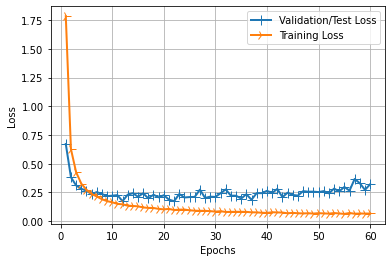

In [23]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label= 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


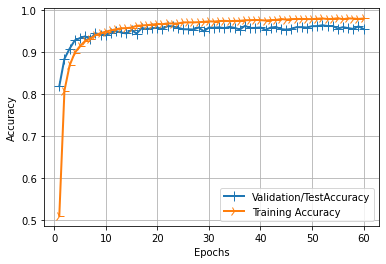

In [24]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/TestAccuracy')
line2 = plt.plot(epochs, acc_values, label= 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()
